In [12]:

%pylab inline
file=open('animation.ipynb','r')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
display_animation(anim)

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named JSAnimation.IPython_display

((0, 1), [])

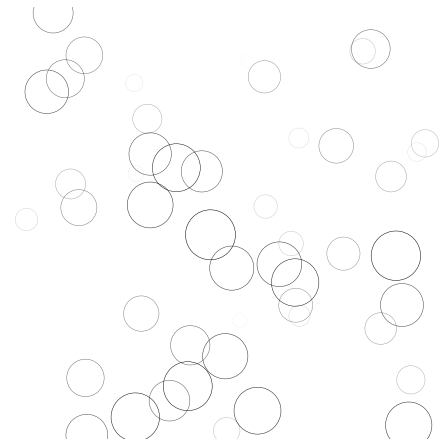

In [8]:
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])
plot.show

In [9]:
def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)

    # Return the modified object
    return scat,

In [13]:
anim = animation.FuncAnimation(fig, update, frames=200, interval=10, blit=True)
display_animation(anim)

NameError: name 'display_animation' is not defined

NameError: name 'display_animation' is not defined

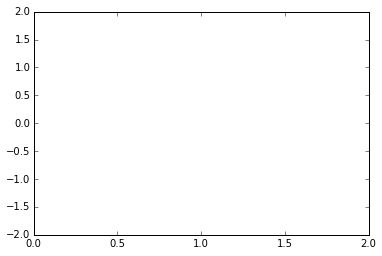

In [14]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
display_animation(anim)


In [19]:
import urllib
from mpl_toolkits.basemap import Basemap

# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the last 30 days
# url = urllib.request.urlopen(feed + "significant_month.csv")

# Magnitude > 4.5
# url = urllib.request.urlopen(feed + "4.5_month.csv")

# Magnitude > 2.5
#url = urllib.request.urlopen(feed + "2.5_month.csv")

# Magnitude > 1.0
url = urllib.request.urlopen(feed + "1.0_month.csv")

# Reading and storage of data
data = url.read().split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])

for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])

ImportError: cannot import name pyproj